<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Experiment-without-transformed-data" data-toc-modified-id="Experiment-without-transformed-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Experiment without transformed data</a></span></li><li><span><a href="#Comparing-base-line-models" data-toc-modified-id="Comparing-base-line-models-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Comparing base-line models</a></span></li><li><span><a href="#Individual-Estimators-and-tuning-them" data-toc-modified-id="Individual-Estimators-and-tuning-them-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Individual Estimators and tuning them</a></span><ul class="toc-item"><li><span><a href="#Light-Gradient-Boosting" data-toc-modified-id="Light-Gradient-Boosting-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Light Gradient Boosting</a></span><ul class="toc-item"><li><span><a href="#Tuning-The-LightGBM" data-toc-modified-id="Tuning-The-LightGBM-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Tuning The LightGBM</a></span></li></ul></li><li><span><a href="#Results---1" data-toc-modified-id="Results---1-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Results - 1</a></span></li><li><span><a href="#Other-models-mentioned-in-the-paper" data-toc-modified-id="Other-models-mentioned-in-the-paper-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Other models mentioned in the paper</a></span><ul class="toc-item"><li><span><a href="#Decision-Tree" data-toc-modified-id="Decision-Tree-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Decision Tree</a></span></li><li><span><a href="#KNN" data-toc-modified-id="KNN-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>KNN</a></span></li></ul></li><li><span><a href="#Ensembling" data-toc-modified-id="Ensembling-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Ensembling</a></span></li><li><span><a href="#Blending" data-toc-modified-id="Blending-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Blending</a></span></li><li><span><a href="#Results---2" data-toc-modified-id="Results---2-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Results - 2</a></span></li></ul></li><li><span><a href="#Experiment-with-transformed-data" data-toc-modified-id="Experiment-with-transformed-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Experiment with transformed data</a></span><ul class="toc-item"><li><span><a href="#Results---3" data-toc-modified-id="Results---3-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Results - 3</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

Git Repo with all the results and models: [Diploma_thesis](https://github.com/Abhiswain97/Diploma_thesis)

In [3]:
from pycaret.classification import *
from sklearn import metrics
from sklearn.model_selection import train_test_split

import seaborn as sns
from joblib import dump, load
import json
import os

sns.set(rc={"figure.figsize": (10, 8)}, font_scale=1.25)

In [4]:
df = pd.read_csv("./DryBeanDataset/Dry_Bean_Dataset.csv").sample(frac=1).reset_index(drop=True)

In [5]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,56329,1019.436,359.427061,204.041941,1.761535,0.823245,58567,267.806479,0.646813,0.961787,0.681117,0.745093,0.006381,0.001213,0.555163,0.977939,HOROZ
1,42625,773.731,292.488461,186.576820,1.567657,0.770124,43203,232.963164,0.820153,0.986621,0.894735,0.796487,0.006862,0.001703,0.634391,0.994508,SIRA
2,40407,760.877,294.386562,175.620024,1.676270,0.802567,40842,226.821053,0.670901,0.989349,0.877077,0.770487,0.007286,0.001584,0.593650,0.995118,DERMASON
3,29451,648.274,243.127696,154.901309,1.569565,0.770765,29778,193.644462,0.778365,0.989019,0.880628,0.796472,0.008255,0.002049,0.634368,0.995682,DERMASON
4,39446,724.726,253.948986,197.859990,1.283478,0.626859,39830,224.107579,0.772633,0.990359,0.943768,0.882491,0.006438,0.002409,0.778790,0.999559,SEKER


In [6]:
X = df.drop('Class', axis=1)
y = df.Class

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [8]:
X_train.shape, X_test.shape

((9527, 16), (4084, 16))

# Experiment without transformed data

Docs: [`PyCaret`](https://pycaret.gitbook.io/docs/)


We setup a pycaret `experiment`. The parameters are:
- `data`: df
- `target`: `Class`
- `normalize`: Normalizes all the numeric features using method mentioned using `normalize_method` if set to `True`
- `transformation`: Applies `yeo-johnson` transformation or method mentioned using `transform_method` if set to `True`
- `fix_imbalance`: Fixes imbalance using `SMOTE` or method mentioned using `imbalance_method` if set to `True`

In [9]:
exp = setup(
    data=df,
    target='Class', 
    train_size=0.7,
    experiment_name='baseline_without_transforms', 
    remove_perfect_collinearity=False
)

,Description,Value
0,session_id,8611
1,Target,Class
2,Target Type,Multiclass
3,Label Encoded,"BARBUNYA: 0, BOMBAY: 1, CALI: 2, DERMASON: 3, HOROZ: 4, SEKER: 5, SIRA: 6"
4,Original Data,"(13611, 17)"
5,Missing Values,False
6,Numeric Features,16
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


# Comparing base-line models

Calling the `compare_models()` is going to fit all classification models for our data

In [11]:
%%time
best_model = compare_models()
best_model

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9267,0.9933,0.9360,0.9271,0.9267,0.9113,0.9114,11.4820
lightgbm,Light Gradient Boosting Machine,0.9265,0.9938,0.9370,0.9269,0.9265,0.9111,0.9112,0.4230
rf,Random Forest Classifier,0.9208,0.9920,0.9302,0.9211,0.9207,0.9041,0.9042,0.7220
et,Extra Trees Classifier,0.9151,0.9917,0.9245,0.9156,0.9151,0.8972,0.8973,0.1830
qda,Quadratic Discriminant Analysis,0.9101,0.9914,0.9258,0.9149,0.9107,0.8916,0.8925,0.0230
lda,Linear Discriminant Analysis,0.9062,0.9913,0.9176,0.9162,0.9078,0.8865,0.8883,0.0170
dt,Decision Tree Classifier,0.8921,0.9337,0.9048,0.8930,0.8922,0.8695,0.8696,0.1110
lr,Logistic Regression,0.8713,0.9815,0.8823,0.8731,0.8715,0.8442,0.8444,2.3050
ridge,Ridge Classifier,0.8566,0.0000,0.8710,0.8691,0.8493,0.8251,0.8324,0.0190
nb,Naive Bayes,0.7597,0.9634,0.7625,0.7596,0.7577,0.7094,0.7099,0.0220


Wall time: 3min 13s


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=8611, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

The F1 here is the weighted f1 we are using as a metric. So, that's good, we can also pass a custom metric

**Obvservation**

- Gradient Boosting Classifier performs the best among all the baselines, without us doig any transforming or feature selection at a F1 of approx ~ 93

This is pretty good, let's see if we can stretch it further using tuning the model.

# Individual Estimators and tuning them

We can see there's not much difference between gradient boosting and the LGBM Classifier. WE will start with LGBM as it's faster to train

In [19]:
def plot(estimator, plot_type, dst):
    res = plot_model(
        estimator=estimator, 
        plot=plot_type,
        save=True
    )
    
    os.rename(res, dst)
    for file in os.listdir("."): 
        if file.endswith('.png'):
            os.remove(file)


In [13]:
def clean_params(params):
    d = {}
    for key, value in params.items():
        d[key.replace('actual_estimator__', "")] = value 
    
    return d

In [14]:
def save(model, tuner=None):
    if tuner is not None:
        dump(
            model, 
            filename=f"./ML_models/PC_{model.__class__.__name__}_{tuner.__class__.__name__}.model"
        )
        with open(
            f'./ML_results/PC_{model.__class__.__name__}_{tuner.__class__.__name__}_params.json', 
            mode='w'
        ) as f:
            json.dump(clean_params(tuner.best_params_), fp=f)
        
        print(f"Model saved at: ./ML_models/PC_{model.__class__.__name__}_{tuner.__class__.__name__}.model")
        print(f"Tuner saved at: ./ML_results/PC_{model.__class__.__name__}_{tuner.__class__.__name__}_params.json")
            
    else:
        dump(
            model, 
            filename=f"./ML_models/PC_{model.__class__.__name__}_baseline.model"
        )
        print(f"Model saved at: ./ML_models/PC_{model.__class__.__name__}_baseline.model")
    

## Light Gradient Boosting

In [12]:
%%time
lgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9161,0.9933,0.9243,0.9162,0.9156,0.8983,0.8985
1,0.9224,0.9941,0.9335,0.9225,0.9222,0.9060,0.9061
2,0.9244,0.9938,0.9348,0.9249,0.9246,0.9087,0.9087
3,0.9150,0.9928,0.9287,0.9153,0.9151,0.8972,0.8972
4,0.9412,0.9950,0.9532,0.9415,0.9410,0.9289,0.9291
5,0.9412,0.9953,0.9502,0.9415,0.9413,0.9289,0.9289
6,0.9255,0.9930,0.9356,0.9264,0.9255,0.9097,0.9099
7,0.9202,0.9918,0.9305,0.9212,0.9204,0.9033,0.9034
8,0.9265,0.9947,0.9373,0.9266,0.9265,0.9110,0.9110
9,0.9328,0.9943,0.9421,0.9333,0.9328,0.9186,0.9187


Wall time: 14.3 s


Plotting different plots like confusion matrix and auc is also very easy as simple as 1 line of code. We look at few plots, to asses performance

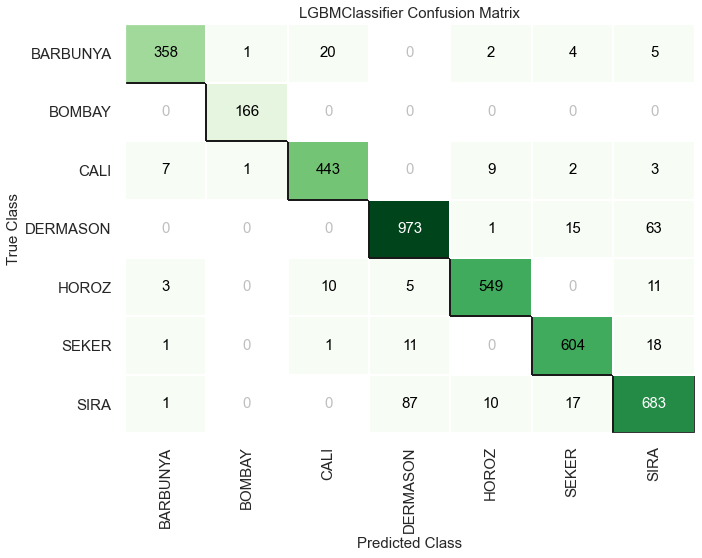

In [15]:
plot_model(lgbm, plot='confusion_matrix')

In [16]:
plot(estimator=lgbm, plot_type='confusion_matrix', dst=f"./ML_results/CF_{lgbm.__class__.__name__}.png")

File already exists skipping......


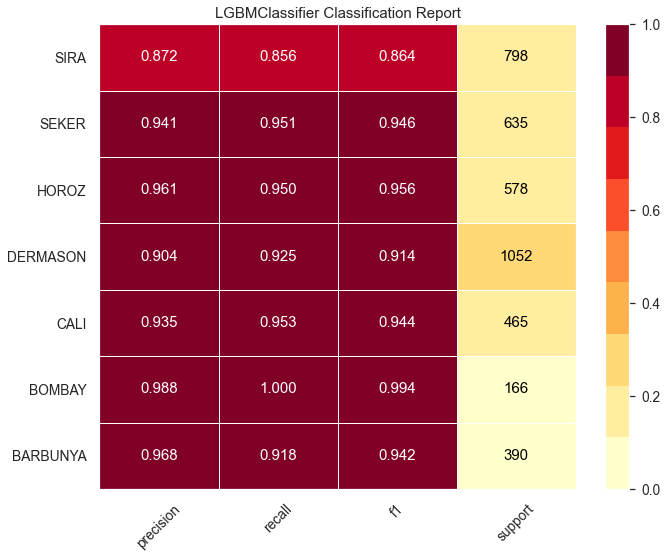

In [17]:
plot_model(lgbm, plot='class_report')

In [20]:
plot(estimator=lgbm, plot_type='class_report', dst=f'./ML_results/ClassReport_{lgbm.__class__.__name__}.png')

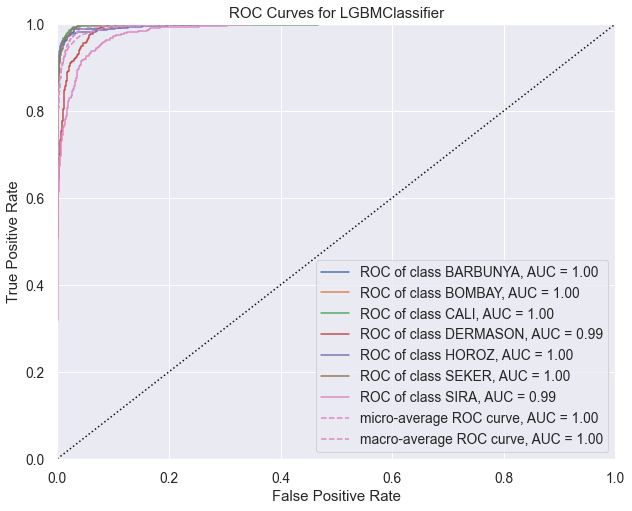

In [21]:
plot_model(estimator=lgbm, plot='auc')

In [22]:
plot(lgbm, plot_type='auc', dst=f"./ML_results/AUC_{lgbm.__class__.__name__}.png")

In [103]:
save(model=lgbm)

Model saved at: ./ML_models/PC_LGBMClassifier_baseline.model


**Obvservation**

- The baseline lightgbm performs well with an f1 of approx ~ 93
- Our model seems to be confused between DERMASON and SIRA varieties
- Our precision, recall and f1 for each class is more than 86, which is also a good indication

### Tuning The LightGBM

Tuning the `LightGBMClassifier`. We can do Grid-search, Random-search as these are the good old hyper paramter tuning methods. But there's a more efficient tuning method using Bayesian Hyperparamter tuning. Here's a one line summary of what bayesian search is:

> Build a probability model of the objective function and use it to select the most promising hyperparameters to evaluate in the true objective function.

In [24]:
%%time
tuned_lgbm, tuner = tune_model(
    estimator=lgbm, 
    search_library="scikit-optimize",
    n_iter=25,
    optimize='f1', return_tuner=True
)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9161,0.9936,0.9256,0.9164,0.9160,0.8983,0.8984
1,0.9244,0.9943,0.9348,0.9242,0.9242,0.9086,0.9087
2,0.9286,0.9938,0.9381,0.9292,0.9288,0.9137,0.9138
3,0.9192,0.9941,0.9313,0.9191,0.9191,0.9023,0.9023
4,0.9391,0.9956,0.9498,0.9391,0.9390,0.9264,0.9264
5,0.9370,0.9953,0.9474,0.9383,0.9374,0.9238,0.9239
6,0.9297,0.9937,0.9383,0.9304,0.9296,0.9148,0.9150
7,0.9149,0.9927,0.9257,0.9167,0.9154,0.8969,0.8971
8,0.9254,0.9945,0.9350,0.9256,0.9254,0.9097,0.9097
9,0.9370,0.9947,0.9456,0.9378,0.9372,0.9237,0.9237


Wall time: 2min 8s


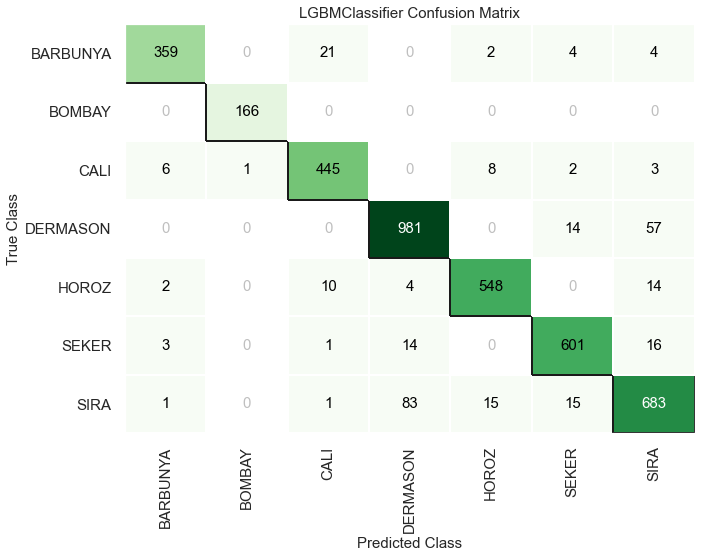

In [25]:
plot_model(tuned_lgbm, plot='confusion_matrix')

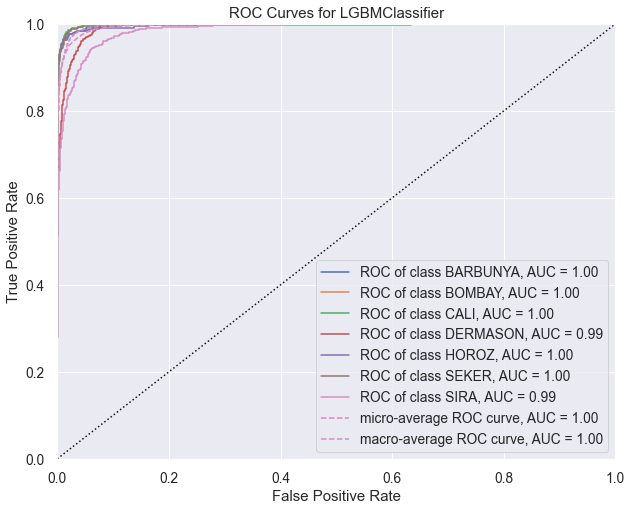

In [26]:
plot_model(tuned_lgbm, plot='auc')

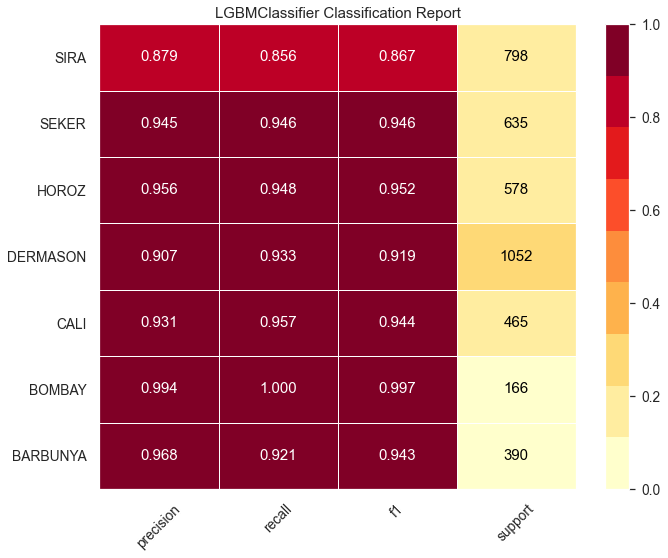

In [27]:
plot_model(tuned_lgbm, plot='class_report')

In [28]:
plot_model(tuned_lgbm, plot='parameter')

,Parameters
boosting_type,gbdt
class_weight,None
colsample_bytree,1.0
importance_type,split
learning_rate,0.019076619970704894
max_depth,-1
min_child_samples,82
min_child_weight,0.001
min_split_gain,0.8517813449656846
n_estimators,251


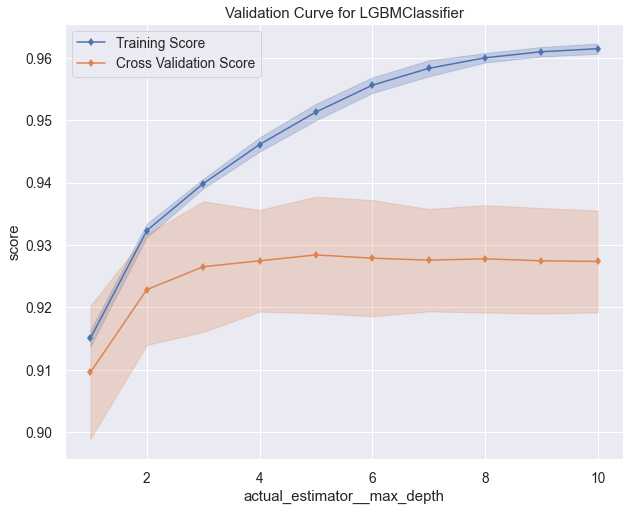

In [64]:
plot_model(tuned_lgbm, plot='vc')

We can access the search space easily too:

In [29]:
params = tuner.get_params()
params['search_spaces']

{'actual_estimator__num_leaves': Integer(low=2, high=256, prior='uniform', transform='normalize'),
 'actual_estimator__learning_rate': Real(low=1e-06, high=0.5, prior='log-uniform', transform='normalize'),
 'actual_estimator__n_estimators': Integer(low=10, high=300, prior='uniform', transform='normalize'),
 'actual_estimator__min_split_gain': Real(low=0, high=1, prior='uniform', transform='normalize'),
 'actual_estimator__reg_alpha': Real(low=1e-10, high=10, prior='log-uniform', transform='normalize'),
 'actual_estimator__reg_lambda': Real(low=1e-10, high=10, prior='log-uniform', transform='normalize'),
 'actual_estimator__feature_fraction': Real(low=0.4, high=1, prior='uniform', transform='normalize'),
 'actual_estimator__bagging_fraction': Real(low=0.4, high=1, prior='uniform', transform='normalize'),
 'actual_estimator__bagging_freq': Integer(low=0, high=7, prior='uniform', transform='normalize'),
 'actual_estimator__min_child_samples': Integer(low=1, high=100, prior='uniform', tran

In [30]:
tuner.best_params_

OrderedDict([('actual_estimator__bagging_fraction', 0.7296123304749516),
             ('actual_estimator__bagging_freq', 2),
             ('actual_estimator__feature_fraction', 0.5806006979897507),
             ('actual_estimator__learning_rate', 0.019076619970704894),
             ('actual_estimator__min_child_samples', 82),
             ('actual_estimator__min_split_gain', 0.8517813449656846),
             ('actual_estimator__n_estimators', 251),
             ('actual_estimator__num_leaves', 219),
             ('actual_estimator__reg_alpha', 0.30854756696416147),
             ('actual_estimator__reg_lambda', 1.6269551037351745e-06)])

All of the class stuff we wrote in the previous notebook where we were doing custom tuning is now reduced to just a single line of code and we have full control over it. The default search-space provided in pycaret is good enough for tuning, but we also pass a custom grid like we did in our previous notebook

In [31]:
plot(tuned_lgbm, plot_type='confusion_matrix', dst=f'./ML_results/CF_Tuned_{tuned_lgbm.__class__.__name__}.png')

In [32]:
plot(tuned_lgbm, plot_type='auc', dst=f'./ML_results/AUC_Tuned_{tuned_lgbm.__class__.__name__}.png')

In [33]:
plot(tuned_lgbm, plot_type='class_report', dst=f'./ML_results/ClassReport_Tuned_{tuned_lgbm.__class__.__name__}.png')

In [104]:
save(tuned_lgbm, tuner=tuner)

Model saved at: ./ML_models/PC_LGBMClassifier_BayesSearchCV.model
Tuner saved at: ./ML_results/PC_LGBMClassifier_BayesSearchCV_params.json


We can also let pycaret choose for us if we don't want to use bayesian search

In [35]:
tuned_lgbm_auto, tuner_auto = tune_model(
    estimator=lgbm, 
    choose_better=True,
    optimize='f1', return_tuner=True
)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9087,0.9927,0.9200,0.9088,0.9086,0.8895,0.8895
1,0.9234,0.9941,0.9349,0.9233,0.9232,0.9073,0.9074
2,0.9286,0.9931,0.9361,0.9293,0.9288,0.9136,0.9137
3,0.9234,0.9933,0.9328,0.9236,0.9234,0.9073,0.9073
4,0.9423,0.9947,0.9528,0.9423,0.9421,0.9302,0.9303
5,0.9370,0.9949,0.9478,0.9378,0.9373,0.9238,0.9239
6,0.9286,0.9931,0.9370,0.9300,0.9288,0.9135,0.9137
7,0.9212,0.9919,0.9318,0.9219,0.9214,0.9046,0.9046
8,0.9191,0.9944,0.9295,0.9192,0.9191,0.9021,0.9021
9,0.9307,0.9939,0.9430,0.9313,0.9308,0.9161,0.9162


In [36]:
tuner_auto.best_params_

{'actual_estimator__reg_lambda': 0.4,
 'actual_estimator__reg_alpha': 0.1,
 'actual_estimator__num_leaves': 20,
 'actual_estimator__n_estimators': 280,
 'actual_estimator__min_split_gain': 0.6,
 'actual_estimator__min_child_samples': 56,
 'actual_estimator__learning_rate': 0.1,
 'actual_estimator__feature_fraction': 0.9,
 'actual_estimator__bagging_freq': 6,
 'actual_estimator__bagging_fraction': 0.7}

In [65]:
tuner_auto.__class__

sklearn.model_selection._search.RandomizedSearchCV

**Obvservation**

- Setting `choose_better=True`, it uses RandomSearchCV instead of BayesSearchCV
- There's no drastic difference between the two. Infact, random search is just randomly searching for the parameters.
- So, BayesSearch is better than random search in the sense that it uses a probability distribution rather than it just doing random search, which is more efficient as the probability guides the search 

## Results - 1

> - The highest accuracy score mentioned in the paper which is 93.13 %. In the paper, they get to it through SVM with a polynomial kernel.
> - We have reached an accuracy of 92.72 % with a LightGBM, which you can say is faster to train than the SVM whose time complexity would be Quadratic
> - I have used no preprocessing or transformation or fixed the target imbalance, similar to the paper
> - I have used all the 16 features

## Other models mentioned in the paper

### Decision Tree

In [73]:
%%time
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8783,0.9250,0.8867,0.8783,0.8780,0.8525,0.8527
1,0.8982,0.9380,0.9091,0.8993,0.8982,0.8770,0.8772
2,0.8846,0.9293,0.8965,0.8849,0.8847,0.8604,0.8604
3,0.8961,0.9364,0.9093,0.8966,0.8962,0.8745,0.8745
4,0.9087,0.9437,0.9175,0.9086,0.9083,0.8897,0.8898
5,0.8993,0.9384,0.9173,0.9007,0.8995,0.8784,0.8787
6,0.8972,0.9357,0.9090,0.8986,0.8972,0.8754,0.8756
7,0.8845,0.9290,0.8969,0.8869,0.8852,0.8602,0.8603
8,0.8813,0.9271,0.8970,0.8814,0.8812,0.8564,0.8565
9,0.8929,0.9341,0.9089,0.8946,0.8932,0.8705,0.8708


Wall time: 898 ms


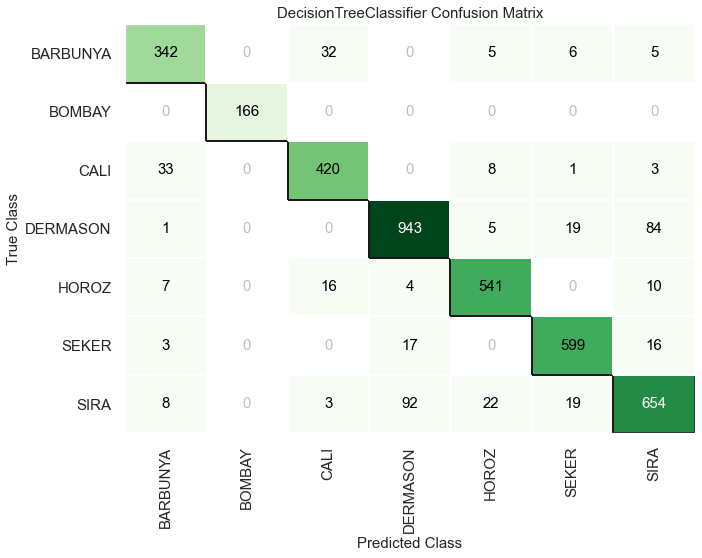

In [47]:
plot_model(dt, plot='confusion_matrix')

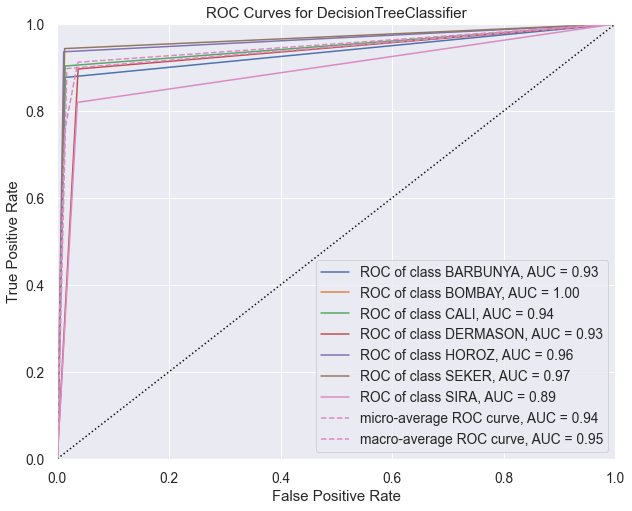

In [51]:
plot_model(dt, plot='auc')

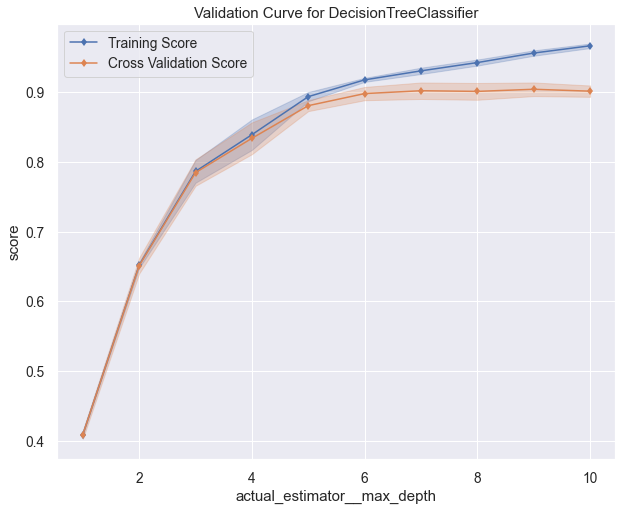

In [67]:
plot_model(dt, plot='vc')

### KNN

In [56]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7230,0.9314,0.7161,0.7227,0.7204,0.6634,0.6642
1,0.7293,0.9355,0.7261,0.7303,0.7275,0.6711,0.6720
2,0.7177,0.9243,0.7191,0.7181,0.7168,0.6577,0.6581
3,0.7209,0.9219,0.7227,0.7215,0.7194,0.6617,0.6623
4,0.7198,0.9210,0.7180,0.7168,0.7147,0.6590,0.6604
5,0.7314,0.9353,0.7331,0.7298,0.7287,0.6737,0.6745
6,0.7209,0.9239,0.7196,0.7218,0.7159,0.6602,0.6621
7,0.7059,0.9169,0.7028,0.7053,0.7016,0.6424,0.6438
8,0.7174,0.9174,0.7132,0.7160,0.7134,0.6564,0.6576
9,0.7090,0.9226,0.7157,0.7071,0.7071,0.6467,0.6470


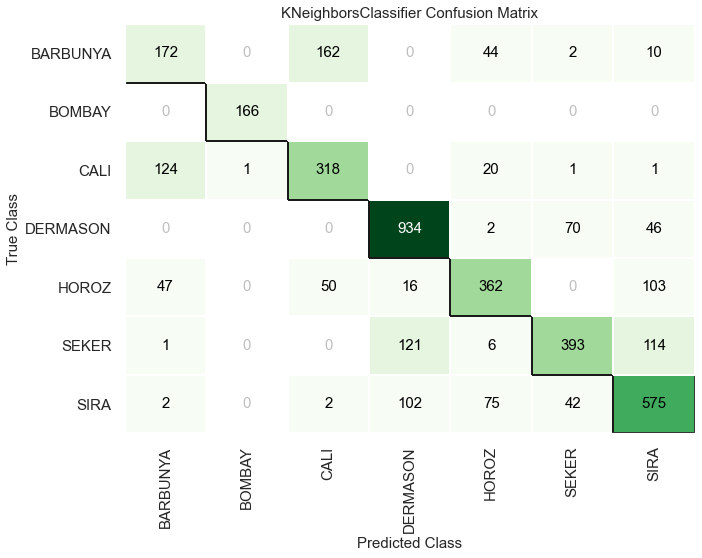

In [57]:
plot_model(knn, plot='confusion_matrix')

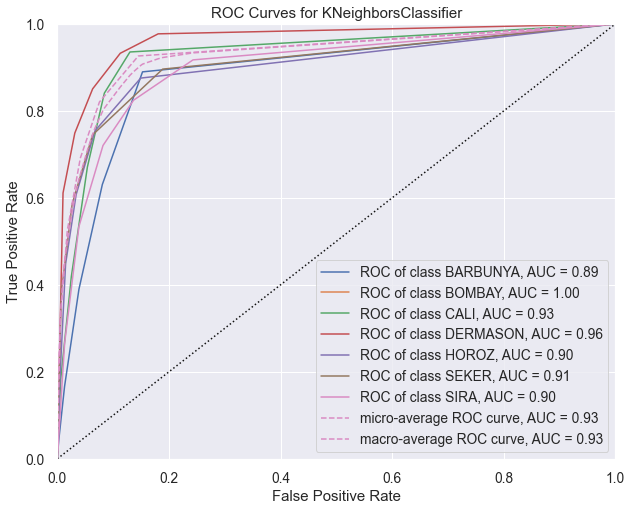

In [58]:
plot_model(knn, plot='auc')

## Ensembling

In [75]:
ensembled_lgbm = ensemble_model(tuned_lgbm, optimize='f1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9119,0.9937,0.9210,0.9121,0.9116,0.8932,0.8934
1,0.9224,0.9943,0.9314,0.9220,0.9220,0.9061,0.9061
2,0.9276,0.9939,0.9362,0.9284,0.9279,0.9124,0.9125
3,0.9192,0.9943,0.9306,0.9192,0.9191,0.9022,0.9023
4,0.9391,0.9957,0.9494,0.9391,0.9390,0.9264,0.9264
5,0.9412,0.9951,0.9499,0.9423,0.9416,0.9289,0.9290
6,0.9328,0.9937,0.9414,0.9338,0.9329,0.9186,0.9188
7,0.9202,0.9926,0.9293,0.9215,0.9205,0.9032,0.9034
8,0.9265,0.9948,0.9360,0.9268,0.9265,0.9109,0.9110
9,0.9275,0.9945,0.9392,0.9285,0.9278,0.9122,0.9123


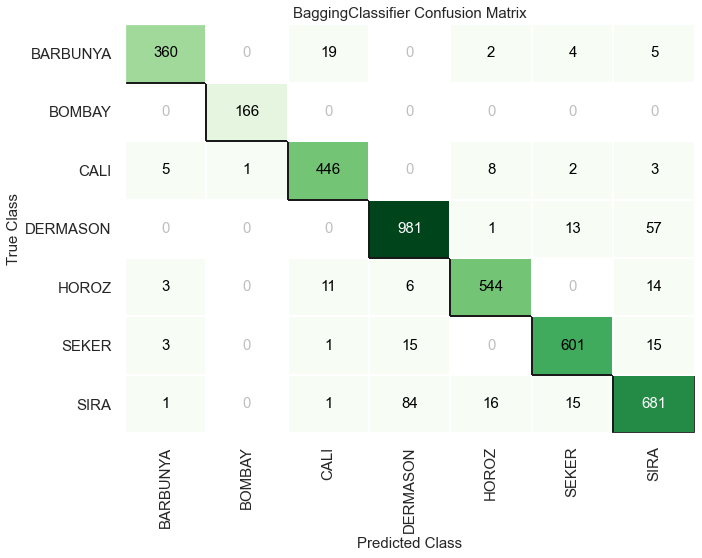

In [78]:
plot_model(ensembled_lgbm, plot='confusion_matrix')

In [79]:
ensembled_dt = ensemble_model(dt, n_estimators=100)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9129,0.9886,0.9179,0.9129,0.9127,0.8945,0.8946
1,0.9171,0.9918,0.9265,0.9169,0.9168,0.8997,0.8998
2,0.9150,0.9918,0.9269,0.9151,0.9150,0.8973,0.8973
3,0.9150,0.9910,0.9282,0.9153,0.9151,0.8973,0.8973
4,0.9307,0.9925,0.9406,0.9311,0.9303,0.9162,0.9165
5,0.9381,0.9935,0.9473,0.9385,0.9382,0.9251,0.9251
6,0.9276,0.9926,0.9368,0.9287,0.9276,0.9122,0.9125
7,0.9086,0.9887,0.9196,0.9101,0.9090,0.8893,0.8894
8,0.9181,0.9921,0.9272,0.9185,0.9179,0.9008,0.9009
9,0.9317,0.9912,0.9397,0.9321,0.9317,0.9173,0.9174


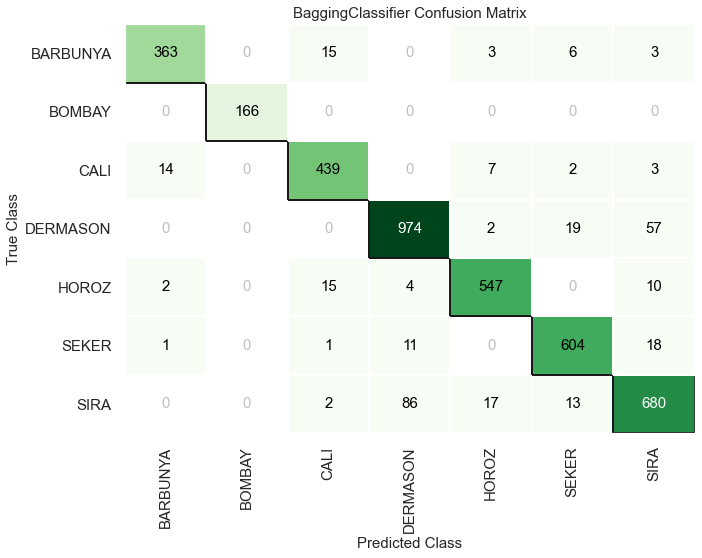

In [83]:
plot_model(ensembled_dt, plot='confusion_matrix')

**Obvsesrvation**

- Both the ensembled LightGBM and Decision tree, do not do well than out tuned LightGBm model.

## Blending

We will try blending the tuned light gbm and ensembled decision tree model

In [88]:
blended_lgbm_dt = blend_models(estimator_list=[tuned_lgbm, ensembled_dt])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9140,0.9932,0.9223,0.9140,0.9138,0.8958,0.8959
1,0.9192,0.9943,0.9294,0.9190,0.9189,0.9022,0.9023
2,0.9224,0.9936,0.9319,0.9224,0.9224,0.9061,0.9061
3,0.9224,0.9938,0.9346,0.9223,0.9223,0.9061,0.9061
4,0.9402,0.9953,0.9497,0.9402,0.9400,0.9276,0.9277
5,0.9402,0.9953,0.9498,0.9411,0.9405,0.9276,0.9277
6,0.9339,0.9938,0.9421,0.9345,0.9338,0.9199,0.9201
7,0.9191,0.9924,0.9299,0.9202,0.9195,0.9020,0.9021
8,0.9254,0.9943,0.9332,0.9260,0.9254,0.9097,0.9098
9,0.9328,0.9942,0.9418,0.9333,0.9329,0.9186,0.9187


In [89]:
tuned_blended_lgbm_dt = tune_model(estimator=blended_lgbm_dt, search_library='scikit-optimize', optimize='f1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9140,0.9934,0.9223,0.9142,0.9139,0.8958,0.8959
1,0.9234,0.9943,0.9328,0.9232,0.9231,0.9073,0.9074
2,0.9244,0.9937,0.9341,0.9247,0.9245,0.9086,0.9087
3,0.9203,0.9939,0.9323,0.9202,0.9202,0.9036,0.9036
4,0.9391,0.9953,0.9492,0.9391,0.9390,0.9264,0.9265
5,0.9402,0.9953,0.9494,0.9411,0.9405,0.9276,0.9277
6,0.9349,0.9938,0.9428,0.9356,0.9348,0.9212,0.9214
7,0.9191,0.9926,0.9292,0.9205,0.9195,0.9020,0.9021
8,0.9244,0.9943,0.9315,0.9248,0.9243,0.9084,0.9085
9,0.9380,0.9944,0.9460,0.9386,0.9381,0.9249,0.9250


## Results - 2

> - The highest accuracy score mentioned in the paper which is 93.13 %. In the paper, they get to it through SVM with a polynomial kernel.
> - We have reached an accuracy of 92.78 % with a blended model of tuned lightgbm + ensembled decision tree, 
> - I have used no preprocessing or transformation or fixed the target imbalance, similar to the paper
> - I have used all the 16 features

# Experiment with transformed data

In [93]:
exp = setup(
    data=df,
    target='Class', 
    train_size=0.7,
    experiment_name='baseline_with_transforms', 
    remove_perfect_collinearity=False, fix_imbalance=True, normalize=True, transformation=True
)

,Description,Value
0,session_id,8196
1,Target,Class
2,Target Type,Multiclass
3,Label Encoded,"BARBUNYA: 0, BOMBAY: 1, CALI: 2, DERMASON: 3, HOROZ: 4, SEKER: 5, SIRA: 6"
4,Original Data,"(13611, 17)"
5,Missing Values,False
6,Numeric Features,16
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [94]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9282,0.9941,0.9385,0.9289,0.9283,0.9132,0.9133,0.7340
gbc,Gradient Boosting Classifier,0.9256,0.9933,0.9370,0.9263,0.9256,0.9100,0.9102,15.1990
rf,Random Forest Classifier,0.9230,0.9918,0.9331,0.9235,0.9230,0.9068,0.9069,0.9260
lr,Logistic Regression,0.9228,0.9937,0.9364,0.9240,0.9230,0.9068,0.9070,0.6350
et,Extra Trees Classifier,0.9216,0.9919,0.9322,0.9222,0.9217,0.9052,0.9053,0.2930
knn,K Neighbors Classifier,0.9206,0.9790,0.9330,0.9219,0.9208,0.9041,0.9043,0.0850
svm,SVM - Linear Kernel,0.9103,0.0000,0.9238,0.9110,0.9099,0.8916,0.8919,0.0980
qda,Quadratic Discriminant Analysis,0.9091,0.9910,0.9264,0.9143,0.9096,0.8904,0.8915,0.0450
lda,Linear Discriminant Analysis,0.9062,0.9924,0.9228,0.9133,0.9070,0.8868,0.8881,0.0570
nb,Naive Bayes,0.8961,0.9902,0.9056,0.8987,0.8963,0.8745,0.8750,0.0400


In [95]:
best_model

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=8196, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

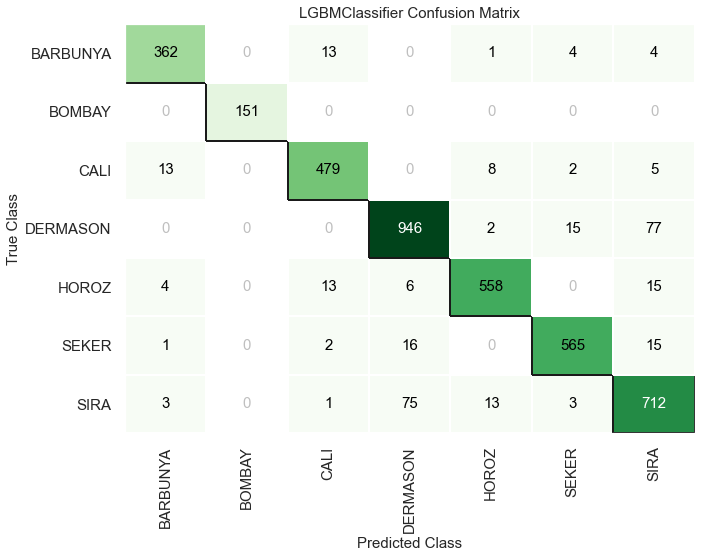

In [96]:
plot_model(best_model, plot='confusion_matrix')

In [100]:
%%time
tuned_lgbm_transformed, tuner_lgbm_transformed = tune_model(
    best_model, 
    optimize='f1', 
    search_library='scikit-optimize', 
    return_tuner=True
)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9433,0.9946,0.9506,0.9434,0.9433,0.9315,0.9315
1,0.9349,0.9952,0.9442,0.9350,0.9349,0.9213,0.9213
2,0.9203,0.9943,0.9342,0.9211,0.9205,0.9035,0.9036
3,0.9276,0.9945,0.9315,0.9280,0.9277,0.9123,0.9124
4,0.9171,0.9928,0.9312,0.9171,0.9169,0.8997,0.8998
5,0.9360,0.9944,0.9438,0.9362,0.9360,0.9226,0.9226
6,0.9286,0.9945,0.9385,0.9287,0.9286,0.9137,0.9137
7,0.9286,0.9931,0.9388,0.9302,0.9289,0.9137,0.9139
8,0.9181,0.9945,0.9367,0.9203,0.9184,0.9012,0.9016
9,0.9349,0.9939,0.9450,0.9349,0.9345,0.9212,0.9213


Wall time: 1min 34s


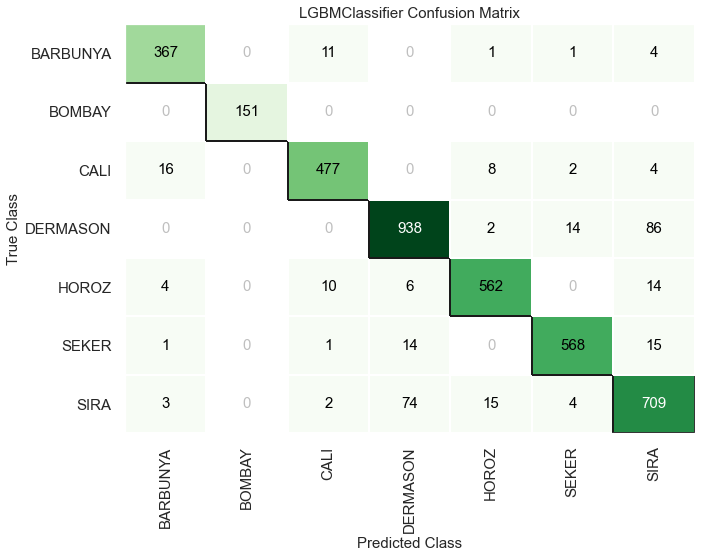

In [98]:
plot_model(tuned_lgbm_transformed, plot='confusion_matrix')

## Results - 3

> - The highest accuracy score mentioned in the paper which is 93.13 %. In the paper, they get to it through SVM with a polynomial kernel.
> - We have reached an accuracy of 92.9 % ~ 93 % with lightgbm after preprocessing the data by normalizing it and fixing the imbalance 
> - I have used all the 16 features

In [99]:
plot(
    estimator=tuned_lgbm_transformed, 
    plot_type='confusion_matrix', 
    dst=f"./ML_results/CF_Transformed_Tuned_{tuned_lgbm_transformed.__class__.__name__}.png"
)

In [106]:
dump(
    tuner_lgbm_transformed, 
    filename=f"./ML_models/PC_Transformed_{tuner_lgbm_transformed.__class__.__name__}_{tuner_lgbm_transformed.__class__.__name__}.model")
with open(
    f'./ML_results/PC_Transformed_{tuned_lgbm_transformed.__class__.__name__}_{tuner_lgbm_transformed.__class__.__name__}_params.json', 
    mode='w'
) as f:
    json.dump(clean_params(tuner_lgbm_transformed.best_params_), fp=f)

# Conclusion

- The best model found was transformed data + Light Gradient Boosting 
- We can also go with simple Light Gradient Boosting as the difference between them is not that significant

Git Repo with all the results and models: [Diploma_thesis](https://github.com/Abhiswain97/Diploma_thesis)